## Введение в ТВиМС: практикум по описанию выборок №1

*Aлла Тамбовцева, НИУ ВШЭ*

### Часть 1: работа с выборкой с библиотекой NumPy

Импортируем библиотеку `numpy` для работы с массивами, прежде всего, числовыми (*NumPy* – от *numeric Python*):

In [1]:
import numpy as np

Создадим массив с выборкой из семинарского листочка:

In [2]:
sample = np.array([2, 1, 0, 20, 3, 1, 0])
print(sample)

[ 2  1  0 20  3  1  0]


На числовых массивах определён ряд методов, позволяющих получить описательные статистики по выборке:

* `min()` и `max()`: минимальное и максимальное значение;
* `mean()`: среднее значение.

In [3]:
print("Min:", sample.min())
print("Max:", sample.max())
print("Mean:", sample.mean())

Min: 0
Max: 20
Mean: 3.857142857142857


Методов для нахождения медианы и квартилей нет, вместо них используются соответствующие функции из `NumPy`:

In [4]:
print("Median:", np.median(sample))
print("25%:", np.quantile(sample, 0.25))
print("75%:", np.quantile(sample, 0.75))

Median: 1.0
25%: 0.5
75%: 2.5


Если нам нужно определить межквартильный размах, можем просто сохранить верхний и нижний квартили в переменные и вычесть из одного значения другое:

In [5]:
Q1 = np.quantile(sample, 0.25)
Q3 = np.quantile(sample, 0.75)
IQR = Q3 - Q1
print(IQR)

2.0


Определим границы характерных значений и выведем их в виде списка:

In [6]:
[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

[-2.5, 5.5]

Чтобы выбрать те значения, которые в полученный интервал не входят (выбрать нетипичные значения или выбросы), сохраним границы интервала в переменные:

In [7]:
left = Q1 - 1.5 * IQR
right = Q3 + 1.5 * IQR

И сформулируем условие для отбора в квадратных скобках:

In [8]:
sample[(sample < left) | (sample > right)]

array([20])

Логика работы условия выше простая: выбери из `sample` те значения, на которых условие в квадратных скобках возвращает `True`:

In [9]:
(sample < left) | (sample > right)

array([False, False, False,  True, False, False, False])

Теперь построим график, который визуализирует описательные статистики и наличие/отсутствие нехарактерных значений. Этот график называется *ящик с усами* (*boxplot* или *box-and-whiskers plot*). Для этого импортируем из библиотеки `matplotlib` модуль `pyplot` для отрисовки графиков:

In [10]:
from matplotlib import pyplot as plt

И построим сам график для нашей выборки:

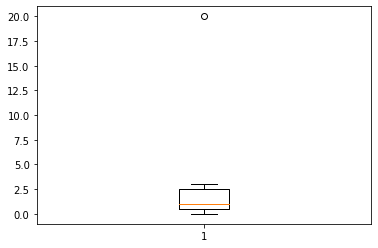

In [11]:
# добавление ; в конце позволяет отрисовать график 
# в чистом виде, без лишней информации перед картинкой

plt.boxplot(sample);

Границы ящика соответствуют нижнему и верхнему квартилю, линия внутри ящика – медиане. Усы ящика строятся по-разному, в зависимости от данных:

* если нехарактерных значений нет, граница нижнего и верхнего уса – просто минимальное и максимальное значение в выборке;
* если нехарактерные значения есть, граница нижнего уса – минимальное значение среди типичных, а граница верхнего уса – максимальное значение среди типичных, нетипичные значения обозначаются точками вне ящика.

Добавим цвет заливки для ящика и цвет его границ:

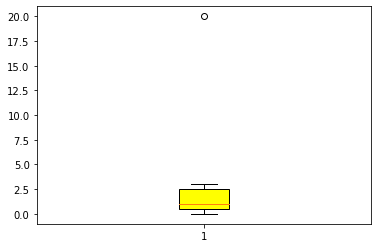

In [12]:
plt.boxplot(sample, 
            patch_artist = True, 
            boxprops = dict(facecolor = "yellow", color = "black"));

Если в конце строки для построения графика мы не поставим `;`, Python нам покажет словарь, на основе которого отрисовывается график:

{'whiskers': [<matplotlib.lines.Line2D at 0x111c10150>,
 'caps': [<matplotlib.lines.Line2D at 0x111c10c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x111c074d0>],
 'medians': [<matplotlib.lines.Line2D at 0x111c17690>],
 'fliers': [<matplotlib.lines.Line2D at 0x111c17b90>],
 'means': []}

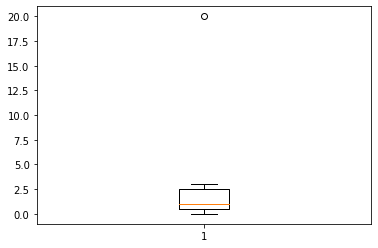

In [13]:
plt.boxplot(sample)

Если сохранить этот словарь в переменную, из него можно будет извлечь вспомогательные данные.

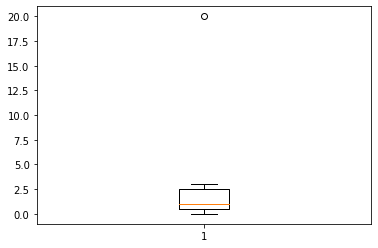

In [14]:
box = plt.boxplot(sample)

Например, те же выбросы в виде массива:

In [15]:
# извлекаем запись по ключу fliers, fliers = outliers,
# из нее один элемент с индексом 0,
# а из него – значения по оси y

box["fliers"][0].get_ydata()

array([20])

Более подробно про ящик с усами можно почитать в официальной [документации](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

### Часть 2: работа с выборкой с библиотекой SciPy

Импортируем из библиотеки `scipy` для научных вычислений (от *Scientific Python*) модуль `stats`:

In [16]:
from scipy import stats

Вызовем из этого модуля функцию `describe()` для получения описательных статистик:

In [17]:
stats.describe(sample)

DescribeResult(nobs=7, minmax=(0, 20), mean=3.857142857142857, variance=51.80952380952382, skewness=1.9493974630335922, kurtosis=1.9618625310877995)

Здесь:
   
* `nobs`: число наблюдений;
* `minmax`: кортеж с минимумом и максимумом;
* `mean`: среднее;
* `variance`: выборочная дисперсия;
* `skewness`: коэффициент [скошенности](https://en.wikipedia.org/wiki/Skewness) (насколько распределение несимметрично, скошено вправо или влево);
* `kurtosis`: коэффициент [эксцесса](https://en.wikipedia.org/wiki/Kurtosis) (насколько выражен пик распределения, «плоское» оно или «остроконечное»).

Можем сохранить результат выше в переменную и извлечь из неё характеристики отдельно:

In [18]:
desc = stats.describe(sample)
print("N:", desc.nobs)
print("Mean:", desc.mean)
print("Min:", desc.minmax[0])
print("Max:", desc.minmax[1])

# размах: max - min
print("Range:", desc.minmax[1] - desc.minmax[0])

N: 7
Mean: 3.857142857142857
Min: 0
Max: 20
Range: 20


Также в `stats` есть полезная функция `iqr()`, она умеет считать межквартильный размах:

In [19]:
stats.iqr(sample)

2.0

И, наконец, в `stats` есть функция `rankdata()`, которая определяет ранги наблюдений (с усреднением, как мы вычисляли вручную):

In [20]:
stats.rankdata(sample)

array([5. , 3.5, 1.5, 7. , 6. , 3.5, 1.5])

### Часть 3: работа с реальными данными в виде датафреймов Pandas

В файле `coffee_and_code.csv` содержатся результаты опроса программистов:

* `CodingHours`: время, которое респондент тратит на написание кода (число часов в день);
* `CoffeeCupsPerDay`: количество чашек кофе, которое респондент выпивает в день;
* `CoffeeTime`: когда респондент пьет кофе (перед написанием кода, во время написания кода, весь день и прочие варианты);
* `CodingWithoutCoffee`: пишет ли респондент код без кофе (да, нет, иногда);
* `CoffeeType`: тип или марка кофе, предпочитаемые респондентом;
* `CoffeeSolveBugs`: исправляет ли программист баги в коде (да, нет, иногда);
* `Gender`: пол респондента;
* `Country`: страна респондента;
* `AgeRange`: возраст респондента (по категориям).

Импортируем библиотеку `pandas` для загрузки и обработки данных в табличном виде, её обычно импортируют с сокращённым названием `pd`:

In [21]:
import pandas as pd

Загрузим данные из CSV-файла (расширение `.csv` – от *comma separated values*, то есть значения, разделённые запятыми):

In [22]:
df = pd.read_csv("coffee_and_code.csv")

Посмотрим на датафрейм:

In [23]:
df

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29
...,...,...,...,...,...,...,...,...,...
95,6,2,Before coding,Yes,Nescafe,Yes,Male,Lebanon,18 to 29
96,4,1,Before coding,Sometimes,Nescafe,Sometimes,Female,Lebanon,18 to 29
97,10,3,Before coding,Yes,Cappuccino,Yes,Male,Lebanon,Under 18
98,2,2,While coding,Sometimes,Espresso (Short Black),Sometimes,Female,Lebanon,18 to 29


Можем вызвать первые несколько строк:

In [24]:
df.head(3)

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29


Или последние:

In [25]:
df.tail(3)

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
97,10,3,Before coding,Yes,Cappuccino,Yes,Male,Lebanon,Under 18
98,2,2,While coding,Sometimes,Espresso (Short Black),Sometimes,Female,Lebanon,18 to 29
99,10,4,Before coding,Sometimes,Double Espresso (Doppio),Sometimes,Male,Lebanon,18 to 29


Теперь запросим техническую информацию по датафрейму:

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CodingHours          100 non-null    int64 
 1   CoffeeCupsPerDay     100 non-null    int64 
 2   CoffeeTime           100 non-null    object
 3   CodingWithoutCoffee  100 non-null    object
 4   CoffeeType           99 non-null     object
 5   CoffeeSolveBugs      100 non-null    object
 6   Gender               100 non-null    object
 7   Country              100 non-null    object
 8   AgeRange             98 non-null     object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


Метод `.info()` возвращает число строк в датафрейме (`100 entries`), перечень столбцов с сохранёнными в них типами данных (`Dtype`) и количество заполненных ячеек (`Not-Null Count`) в каждом столбце. Обратите внимание: строковый тип в `pandas` называется не `string`, а `object`.

Теперь вызовем статистическое описание датафрейма – основные описательные статистики:

In [27]:
df.describe()

,CodingHours,CoffeeCupsPerDay
count,100.000000,100.000000
mean,6.410000,2.890000
std,2.644205,1.613673
min,1.000000,1.000000
25%,4.000000,2.000000
50%,7.000000,2.500000
75%,8.000000,4.000000
max,10.000000,8.000000


По умолчанию метод `.describe()` возвращает характеристики только числовых столбцов:

* `count`: число заполненных ячеек в столбце;
* `mean`: среднее арифметическое;
* `std`: стандартное отклонение, посчитанное по столбцу;
* `25%`, `50%`, `75%`: нижний квартиль, медиана, верхний квартиль;
* `min` и `max`: минимальное и максимальное значение.

Если мы хотим описать текстовые столбцы, мы сможем это сделать – добавим аргумент `include` и укажем в нём соответствующий тип:

In [28]:
df.describe(include = "object")

,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
count,100,100,99,100,100,100,98
unique,7,3,8,3,2,1,5
top,While coding,Sometimes,Nescafe,Sometimes,Male,Lebanon,18 to 29
freq,61,51,32,43,74,100,60


Для текстовых столбцов метод `.describe()` возвращает следующие характеристики:
    
* `count`: число заполненных ячеек в столбце;
* `unique`: число уникальных значений в столбце;
* `top`: мода – самое частое значение в столбце;
* `freq`: частота, которая соответствует моде (сколько раз встретилось значение, указанное в `top`).

Если хочется увидеть частоты для всех уникальных значений, пригодится метод `.value_counts()`. Выберем столбец с типом кофе по названию (как из словаря!) и получим по нему таблицу с частотами: 

In [29]:
df["CoffeeType"].value_counts()

Nescafe                     32
American Coffee             23
Turkish                     19
Espresso (Short Black)       8
Cappuccino                   7
Caffè latte                  5
Double Espresso (Doppio)     3
Americano                    2
Name: CoffeeType, dtype: int64

Вернёмся к числовым столбцам. Выведем описательные статистики для числа чашек кофе, выпиваемым программистами:

In [30]:
df["CoffeeCupsPerDay"].describe()

count    100.000000
mean       2.890000
std        1.613673
min        1.000000
25%        2.000000
50%        2.500000
75%        4.000000
max        8.000000
Name: CoffeeCupsPerDay, dtype: float64

Или отдельно:

In [31]:
print(df["CoffeeCupsPerDay"].min())
print(df["CoffeeCupsPerDay"].max())
print(df["CoffeeCupsPerDay"].mean())

1
8
2.89


Квартили и медиана:

In [32]:
print(df["CoffeeCupsPerDay"].quantile(0.25))
print(df["CoffeeCupsPerDay"].quantile(0.5))
print(df["CoffeeCupsPerDay"].quantile(0.75))

2.0
2.5
4.0


Теперь вычислим ранги наблюдений:

In [33]:
df["CoffeeCupsPerDay"].rank()

0     33.5
1     33.5
2     62.0
3     33.5
4     62.0
      ... 
95    33.5
96     8.5
97    62.0
98    33.5
99    81.0
Name: CoffeeCupsPerDay, Length: 100, dtype: float64

В завершение вводного знакомства с описанием данных в Python выведем описательные статистики по группам. Сравним характеристики программистов, по-разному относящихся к багам в коде.

Сначала посмотрим на средние значения числовых столбцов:

In [34]:
# в .groupby() – столбец, по которому группируем данные
# далее – нужная функция 

df.groupby("CoffeeSolveBugs").mean()

,CodingHours,CoffeeCupsPerDay
CoffeeSolveBugs,,
No,6.518519,2.407407
Sometimes,6.046512,2.790698
Yes,6.833333,3.466667


А теперь посмотрим на минимальные и максимальные значения, средние и медианы:

In [35]:
# в .groupby() – столбец, по которому группируем данные
# в .agg() – перечень функций в кавычках

df.groupby("CoffeeSolveBugs").agg(["min", "max", "mean", "median"])

CodingHours                      CoffeeCupsPerDay      \
                        min max      mean median              min max   
CoffeeSolveBugs                                                         
No                        2  10  6.518519    7.0                1   6   
Sometimes                 2  10  6.046512    6.0                1   8   
Yes                       1  10  6.833333    7.5                1   8   

                                  
                     mean median  
CoffeeSolveBugs                   
No               2.407407    2.0  
Sometimes        2.790698    3.0  
Yes              3.466667    3.0